In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, SimpleRNN,Dropout
from keras.models import Sequential

In [11]:
df=pd.read_pickle('sms_cleanedData.pkl')
df

,text,label
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he go to usf he life around h...,0
...,...,...
5567,this is the 2nd time we have tried 2 contact u...,1
5568,will ì b going to esplanade fr home,0
5569,pity wa in mood for that soany other suggestion,0
5570,the guy did some bitching but i acted like id ...,0


In [12]:
df=shuffle(df)
df=df.reset_index(drop=True)
df

,text,label
0,u repeat e instruction again wats e road name ...,0
1,helloooo wake up sweet morning welcome you enj...,0
2,it really getting me down just hanging around,0
3,where at were hungry too,0
4,what hello wats talk email address,0
...,...,...
5567,look like u wil b getting a headstart im leavi...,0
5568,wow so healthy old airport rd lor cant thk of ...,0
5569,i know you are can you pls open the back,0
5570,might ax well im there,0


In [13]:
df['label'].value_counts()

,count
label,
0,4825
1,747


In [14]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df['text'])
len(tokenizer.word_index)

9011

In [18]:
# tokenizer.word_index

In [21]:
sequences=tokenizer.texts_to_sequences(df['text'])


5572

In [24]:
len(sequences[130])

7

In [29]:
X_train,X_test,y_train,y_test=train_test_split(sequences,df['label'],test_size=0.2,random_state=42)

In [34]:
X_train=pad_sequences(X_train,padding="post",maxlen=50)
X_test=pad_sequences(X_test,padding="post",maxlen=50)

In [35]:
X_train.shape

(4457, 50)

In [93]:
X_padded=pad_sequences(sequences,padding="post",maxlen=50)

In [80]:
model=Sequential()
model.add(Embedding(len(tokenizer.word_index)+1,32,input_length=50))
model.add(Dropout(0.3))
model.add(SimpleRNN(32))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [98]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 50, 32)              │         288,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 871,493 (3.32 MB)

 Trainable params: 290,497 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580,996 (2.22 MB)

In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=50)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8103 - loss: 0.4816 - val_accuracy: 0.9435 - val_loss: 0.2285
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9291 - loss: 0.2313 - val_accuracy: 0.9462 - val_loss: 0.1796
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9727 - loss: 0.1201 - val_accuracy: 0.9516 - val_loss: 0.1683
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9875 - loss: 0.0701 - val_accuracy: 0.9507 - val_loss: 0.1679
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9885 - loss: 0.0523 - val_accuracy: 0.9561 - val_loss: 0.1845
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9913 - loss: 0.0378 - val_accuracy: 0.9507 - val_loss: 0.1844
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9929 - loss: 0.0370 - val_accuracy: 0.9552 - val_loss: 0.1922
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9967 - loss: 0.0177 - val_accuracy: 0.9444 - v

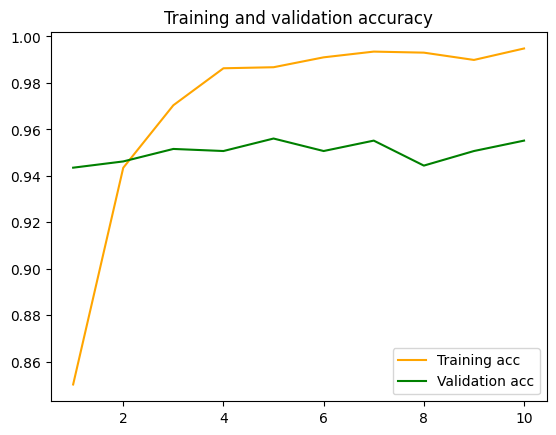

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'-',label='Training acc',color='orange')
plt.plot(epochs,val_acc,'-',label='Validation acc',color='green')
plt.title('Training and validation accuracy')
plt.legend()

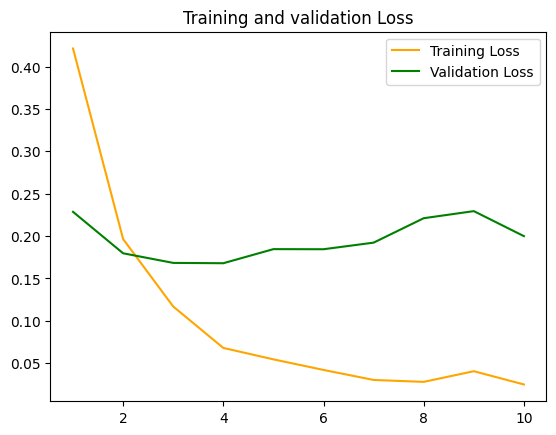

In [85]:
plt.plot(epochs,loss,'-',label='Training Loss',color='orange')
plt.plot(epochs,val_loss,'-',label='Validation Loss',color='green')
plt.title('Training and validation Loss')
plt.legend()

# Confusion Matrix

In [95]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
predict_x = model.predict(X_padded)
pred = np.argmax(predict_x, axis=1)

# Evaluate the model on the test set
acc = model.evaluate(X_padded, df['label'])

# Note: You don't need to pass y_test to the predict method
predict_prob = model.predict(X_padded)
proba_rnn = np.argmax(predict_prob, axis=1)

# Print the test loss and accuracy
print("Test loss is {0:.2f} accuracy is {1:.2f}".format(acc[0], acc[1]))

# Print the confusion matrix
print(confusion_matrix(df['label'], pred))

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9909 - loss: 0.0428
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test loss is 0.04 accuracy is 0.99
[[4825    0]
 [ 747    0]]


In [96]:
model.save('sms_classifier.h5')

In [97]:
import pickle
with open('tokenizer.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)